In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sample data
df = pd.read_csv("output_with_target.csv")

In [ ]:
print(df['Number of years of experience'].describe())

count    704.000000
mean       8.640455
std        5.053339
min        0.000000
25%        5.000000
50%        7.960000
75%       11.420000
max       20.750000
Name: Number of years of experience, dtype: float64


In [ ]:
print(df['Estimated age'].describe())

count    704.000000
mean      32.640455
std        5.053339
min       24.000000
25%       29.000000
50%       31.960000
75%       35.420000
max       44.750000
Name: Estimated age, dtype: float64


In [ ]:
connections_desc = df['connections'].describe()
print(connections_desc)

count      704.000000
mean       780.965909
std       1715.376664
min          0.000000
25%        116.750000
50%        311.500000
75%        734.500000
max      17038.000000
Name: connections, dtype: float64


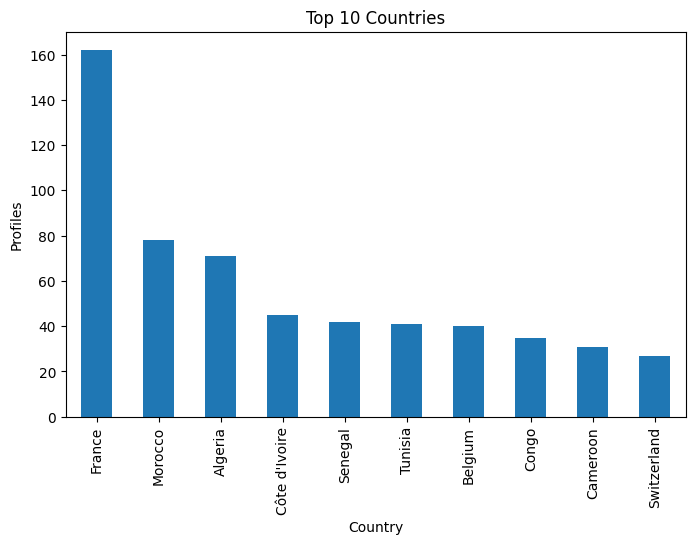

In [ ]:
# ===== 1. Country distribution =====
country_counts = df['country'].value_counts().head(10)
fig1, ax1 = plt.subplots(figsize=(8,5))
country_counts.plot(kind="bar", ax=ax1, title="Top 10 Countries")
ax1.set_xlabel("Country")
ax1.set_ylabel("Profiles")
plt.show()

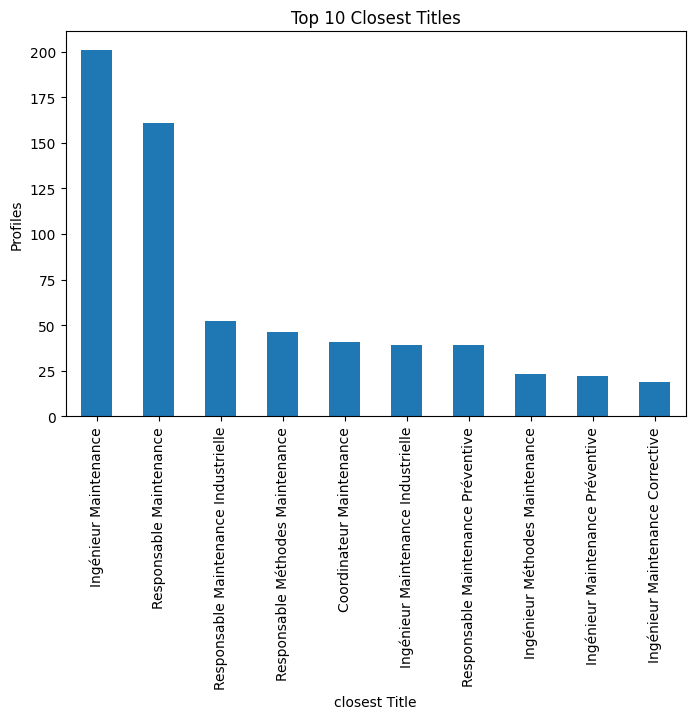

In [ ]:
# ===== 2. Job titles =====
title_counts = df['Target Title'].value_counts().head(10)
fig2, ax2 = plt.subplots(figsize=(8,5))
title_counts.plot(kind="bar", ax=ax2, title="Top 10 Closest Titles")
ax2.set_xlabel("closest Title")
ax2.set_ylabel("Profiles")
plt.show()

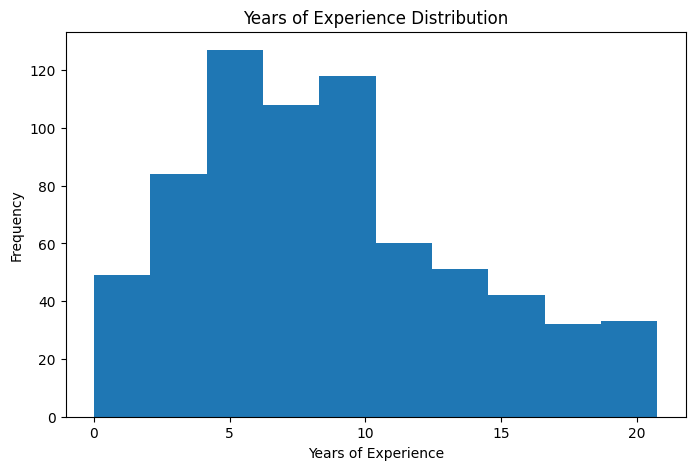

In [ ]:
# ===== 3. Years of experience =====
fig3, ax3 = plt.subplots(figsize=(8,5))
df['Number of years of experience'].dropna().plot(kind="hist", bins=10, ax=ax3, title="Years of Experience Distribution")
ax3.set_xlabel("Years of Experience")
plt.show()

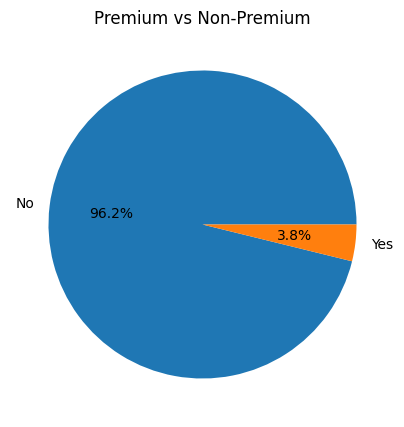

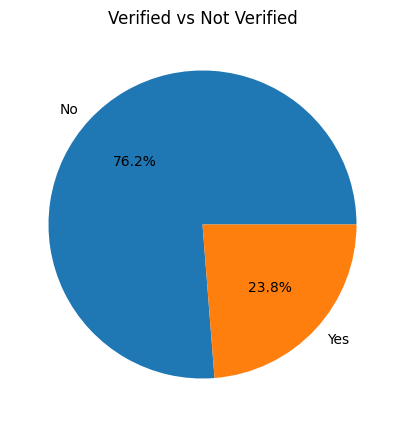

In [ ]:
# Normalize the premium and verified columns
df['premium'] = df['premium'].replace({'False': 'No', 'NO': 'No', 'True': 'Yes', 'YES': 'Yes'})
df['verified'] = df['verified'].replace({'False': 'No', 'NO': 'No', 'True': 'Yes', 'YES': 'Yes'})
# ===== 4. Premium status =====
fig4, ax4 = plt.subplots(figsize=(5,5))
df['premium'].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax4, title="Premium vs Non-Premium")
ax4.set_ylabel("")
plt.show()

# ===== 5. Verified status =====
fig5, ax5 = plt.subplots(figsize=(5,5))
df['verified'].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax5, title="Verified vs Not Verified")
ax5.set_ylabel("")
plt.show()


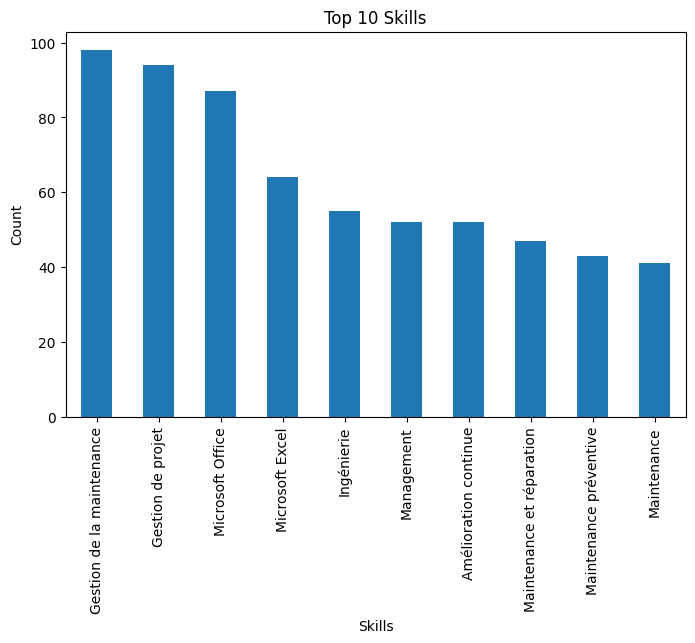

In [ ]:

# ===== 6. Skills =====
skill_cols = [col for col in df.columns if col.startswith("Skills")]
skills = pd.concat([df[col] for col in skill_cols], ignore_index=True).dropna()
skill_counts = skills.value_counts().head(10)
fig6, ax6 = plt.subplots(figsize=(8,5))
skill_counts.plot(kind="bar", ax=ax6, title="Top 10 Skills")
ax6.set_xlabel("Skills")
ax6.set_ylabel("Count")
plt.show()

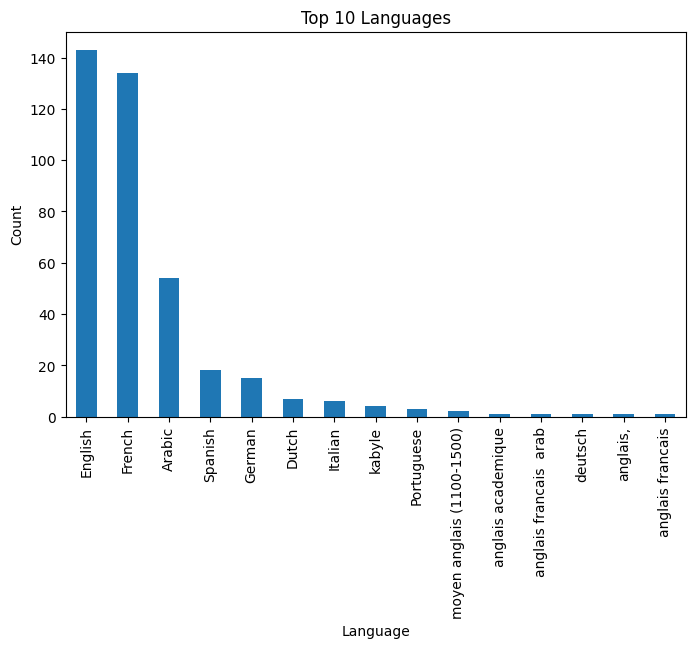

In [ ]:
import unicodedata

def normalize_text(x):
    if isinstance(x, str):
        # Remove accents, lowercase, and strip spaces
        x = ''.join(c for c in unicodedata.normalize('NFD', x) if unicodedata.category(c) != 'Mn')
        return x.strip().lower()
    return x

# Apply normalization
languages = languages.apply(normalize_text)

# Apply mapping AFTER normalization
language_mapping = {
    'anglais': 'English',
    'englais':'English',
    'english': 'English',
    'francais': 'French',
    'french': 'French',
    'arabe': 'Arabic',
    'arabic': 'Arabic',
    'espagnol': 'Spanish',
    'spanish': 'Spanish',
    'allemand': 'German',
    'german': 'German',
    'italien': 'Italian',
    'italian': 'Italian',
    'neerlandais': 'Dutch',
    'dutch': 'Dutch',
    'portugais': 'Portuguese',
    'portuguese': 'Portuguese',
}

languages = languages.replace(language_mapping)

# Now count and plot
lang_counts = languages.value_counts().head(15)
fig7, ax7 = plt.subplots(figsize=(8,5))
lang_counts.plot(kind="bar", ax=ax7, title="Top 10 Languages")
ax7.set_xlabel("Language")
ax7.set_ylabel("Count")
plt.show()



In [ ]:
print(lang_cols)


['Languages 0', 'Languages 1', 'Languages 2', 'Languages 3']


In [ ]:
# --- Safe downloads for all NLTK versions ---
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)


True

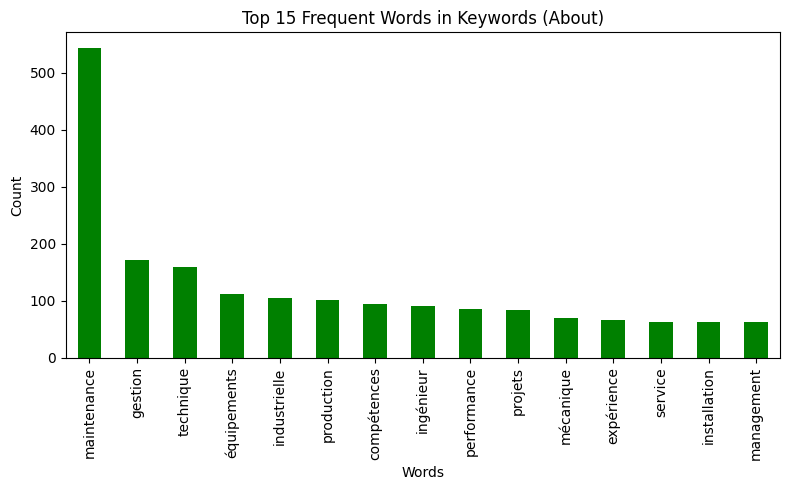

In [ ]:
from collections import Counter
import re
import pandas as pd
import matplotlib.pyplot as plt

# Define your custom stopwords (you can add or remove words here)
custom_stopwords = {
    "a", "an", "and", "et", "le", "la", "les", "de", "des", "du", "en", "pour",
    "to", "of", "in", "on", "at", "by", "with", "the", "is", "are", "or",
    "from", "this", "that", "it", "its", "as", "be", "your", "you", "not","ing","nieur",
    "jai","tences","pr","exp","comp",'nence',"mes",'rience','op','am','chez'
}

# Extract and clean text
keywords = df['Keywords'].dropna().astype(str).tolist()

words = []
for text in keywords:
    # Clean text: keep only letters and numbers
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ]", ' ', text)
    # Split and lowercase
    tokens = text.lower().split()
    # Keep only words that are NOT in custom_stopwords and length > 1
    words.extend([w for w in tokens if w not in custom_stopwords and len(w) > 1])

# Count top words
word_counts = Counter(words)
top_words = dict(word_counts.most_common(15))

# Plot
fig, ax = plt.subplots(figsize=(8,5))
pd.Series(top_words).plot(kind="bar", ax=ax, color="green", title="Top 15 Frequent Words in Keywords (About)")
ax.set_xlabel("Words")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()




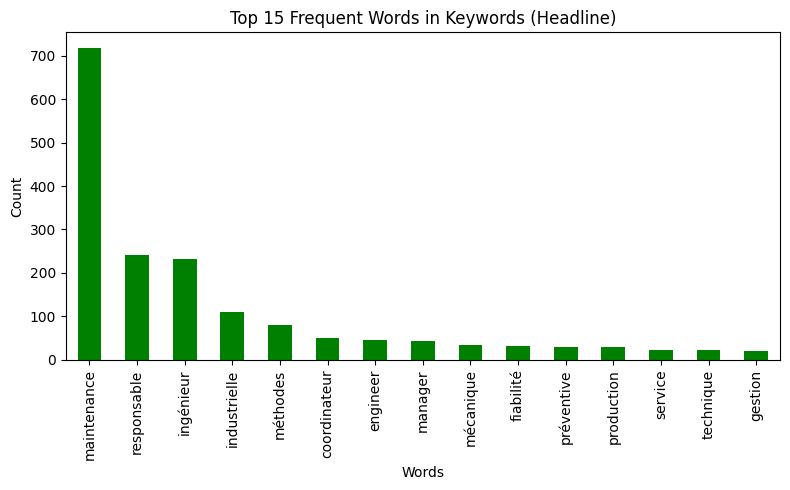

In [ ]:
from collections import Counter
import re
import pandas as pd
import matplotlib.pyplot as plt

# Define your custom stopwords (you can add or remove words here)
custom_stopwords = {
    "a", "an", "and", "et", "le", "la", "les", "de", "des", "du", "en", "pour",
    "to", "of", "in", "on", "at", "by", "with", "the", "is", "are", "or",
    "from", "this", "that", "it", "its", "as", "be", "your", "you", "not","ing","nieur",
    "jai","tences","pr","exp","comp",'nence',"mes",'rience','op','am','chez'
}

# Extract and clean text
keywords = df['Keywords_Headline'].dropna().astype(str).tolist()

words = []
for text in keywords:
    # Clean text: keep only letters and numbers
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ]", ' ', text)
    # Split and lowercase
    tokens = text.lower().split()
    # Keep only words that are NOT in custom_stopwords and length > 1
    words.extend([w for w in tokens if w not in custom_stopwords and len(w) > 1])

# Count top words
word_counts = Counter(words)
top_words = dict(word_counts.most_common(15))

# Plot
fig, ax = plt.subplots(figsize=(8,5))
pd.Series(top_words).plot(kind="bar", ax=ax, color="green", title="Top 15 Frequent Words in Keywords (Headline)")
ax.set_xlabel("Words")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ==========================
# STEP 1 — Custom Stopwords
# ==========================
custom_stopwords = {
    "a", "an", "and", "et", "le", "la", "les", "de", "des", "du", "en", "pour",
    "to", "of", "in", "on", "at", "by", "with", "the", "is", "are", "or",
    "from", "this", "that", "it", "its", "as", "be", "your", "you", "not",
    "ing", "nieur", "jai", "tences", "pr", "exp", "comp", "nence", "mes",
    "rience", "op", "am", "chez"
}

# ==========================
# STEP 2 — Extract Top 15 Words from Each Column
# ==========================
def get_top_words(series, top_n=15):
    words = []
    for text in series.dropna().astype(str):
        text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ]", " ", text.lower())
        tokens = [w for w in text.split() if w not in custom_stopwords and len(w) > 1]
        words.extend(tokens)
    return [w for w, _ in Counter(words).most_common(top_n)]

top_keywords = get_top_words(df["Keywords"], 15)
top_keywords_headline = get_top_words(df["Keywords_Headline"], 15)

print("Top 15 Keywords:", top_keywords)
print("Top 15 Headline Keywords:", top_keywords_headline)

# ==========================
# STEP 3 — Count Matches per Profile
# ==========================
def count_matches(text, top_words):
    if pd.isna(text):
        return 0
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ]", " ", text.lower())
    tokens = set(text.split())
    return sum(1 for w in top_words if w in tokens)

df["keywords_match_count"] = df["Keywords"].apply(lambda x: count_matches(x, top_keywords))
df["headline_match_count"] = df["Keywords_Headline"].apply(lambda x: count_matches(x, top_keywords_headline))

# ==========================
# STEP 4 — Skills, Languages, Connections
# ==========================
# Define skills and languages columns
skills_cols = [col for col in df.columns if "skills" in col.lower()]
language_cols = [col for col in df.columns if "languages" in col.lower()]

# Replace empty strings with NaN
df[skills_cols] = df[skills_cols].replace("", np.nan)
df[language_cols] = df[language_cols].replace("", np.nan)

# Calculate counts
df["skills_count"] = df[skills_cols].notna().sum(axis=1)
df["languages_count"] = df[language_cols].notna().sum(axis=1)

# Log-transform connections
df["connections_log"] = np.log1p(df["connections"])  # log(1 + connections)

# Encode Premium / Verified
df["premium_encoded"] = df["premium"].apply(lambda x: 1 if x in [1, "YES", True, "True"] else 0)
df["verified_encoded"] = df["verified"].apply(lambda x: 1 if x in [1, "YES", True, "True"] else 0)

# ==========================
# STEP 5 — Select Features for Clustering
# ==========================
features = [
    "Number of years of experience",
    "connections_log",
    "skills_count",
    "languages_count",
    "premium_encoded",
    "verified_encoded",
    "Estimated age",
    "keywords_match_count",
    "headline_match_count"
]

X = df[features].fillna(0)

# ==========================
# STEP 6 — Scale + Cluster
# ==========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ==========================
# STEP 7 — Summaries
# ==========================
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
print("\nCluster Summary (Averages):")
print(cluster_summary)

print("\nProfiles per Cluster:")
print(df["Cluster"].value_counts())

# ==========================
# STEP 8 — Optional: Human-readable summary
# ==========================
print("\nCluster Insights:")
for cluster_id, row in cluster_summary.iterrows():
    avg_lang = row["languages_count"]
    avg_exp = row["Number of years of experience"]
    avg_age = row["Estimated age"]
    avg_skills = row["skills_count"]

    lang_desc = (
        "mostly monolingual (1 language)" if avg_lang < 1.5 else
        "bilingual (2 languages)" if avg_lang < 2.5 else
        "multilingual (3+ languages)"
    )
    exp_desc = (
        "very experienced" if avg_exp > 10 else
        "moderately experienced" if avg_exp > 5 else
        "beginners"
    )

    print(f"Cluster {cluster_id}: {lang_desc}, {exp_desc}, around {int(avg_age)} years old, "
          f"with about {round(avg_skills)} skills on average.")


Top 15 Keywords: ['maintenance', 'gestion', 'technique', 'équipements', 'industrielle', 'production', 'compétences', 'ingénieur', 'performance', 'projets', 'mécanique', 'expérience', 'service', 'installation', 'management']
Top 15 Headline Keywords: ['maintenance', 'responsable', 'ingénieur', 'industrielle', 'méthodes', 'coordinateur', 'engineer', 'manager', 'mécanique', 'fiabilité', 'préventive', 'production', 'service', 'technique', 'gestion']

Cluster Summary (Averages):
         Number of years of experience  connections_log  skills_count  \
Cluster                                                                 
0                                15.19             5.43          5.04   
1                                 5.13             4.81          4.27   
2                                 8.07             6.51          5.88   

         languages_count  premium_encoded  verified_encoded  Estimated age  \
Cluster                                                                      

In [ ]:
# Simple natural summary of clusters
print("\nCluster Insights:")
for cluster_id, row in cluster_summary.iterrows():
    avg_lang = row["languages_count"]
    avg_exp = row["Number of years of experience"]
    avg_age = row["Estimated age"]
    avg_skills = row["skills_count"]

    # Create qualitative labels
    lang_desc = (
        "mostly monolingual (1 language)" if avg_lang < 1.5 else
        "bilingual (2 languages)" if avg_lang < 2.5 else
        "multilingual (3+ languages)"
    )
    exp_desc = (
        "very experienced" if avg_exp > 10 else
        "moderately experienced" if avg_exp > 5 else
        "beginners"
    )

    print(f"Cluster {cluster_id}: {lang_desc}, {exp_desc}, around {int(avg_age)} years old, "
          f"with about {round(avg_skills)} skills on average.")



Cluster Insights:
Cluster 0: mostly monolingual (1 language), very experienced, around 39 years old, with about 6 skills on average.
Cluster 1: mostly monolingual (1 language), moderately experienced, around 29 years old, with about 5 skills on average.
Cluster 2: bilingual (2 languages), moderately experienced, around 32 years old, with about 7 skills on average.


In [ ]:
print(df.columns.tolist())


['firstName', 'lastName', 'headline', 'Keywords_Headline', 'Target Title', 'Current position', 'companyName', 'country', 'about', 'Keywords', 'Estimated age', 'Number of years of experience', 'connections', 'Skills 0', 'Skills 1', 'Skills 2', 'Skills 3', 'Skills 4', 'Skills 5', 'Languages 0', 'Languages 1', 'Languages 2', 'Languages 3', 'premium', 'verified', 'linkedinUrl']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sample data
df = pd.read_csv("output_with_target.csv")

In [ ]:
# clustering_experiments_final_k3.py
import os
import sys
import re
import itertools
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# -------------------------
# USER PARAMETERS (edit only CSV_PATH if needed)
# -------------------------
CSV_PATH = "output_with_target.csv"            # <-- set your CSV filename here
OUTPUT_DIR = "clustering_results3"
RANDOM_STATE = 42
K = 3                                 # fixed to 3 clusters as requested
TOP_N_WORDS = 15
MAX_SUBSET_SIZE = 3                   # try combos up to 3 features (change if you want)
MIN_FEATURES_PER_SUBSET = 2         # do NOT evaluate single-feature subsets

# Candidate features to consider (we will compute some from your raw columns)
CANDIDATE_FEATURES = [
    "Estimated age",
    "Number of years of experience",   # will be present in df but we will avoid combos that include both this and Estimated age
    "connections",
    "connections_log",
    "skills_count",
    "languages_count",
    "premium_encoded",
    "verified_encoded",
    "keywords_match_count",
    "headline_match_count"
]

CUSTOM_STOPWORDS = {
    "a","an","and","et","le","la","les","de","des","du","en","pour","to","of","in","on","at","by","with",
    "the","is","are","or","from","this","that","it","its","as","be","your","you","not","ing","nieur","jai",
    "tences","pr","exp","comp","nence","mes","rience","op","am","chez"
}

# -------------------------
# Utility functions
# -------------------------
def ensure_dir(d):
    os.makedirs(d, exist_ok=True)

def extract_top_words(series, top_n=15, stopwords=None):
    if stopwords is None:
        stopwords = set()
    words = []
    for text in series.dropna().astype(str):
        text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ0-9]", " ", text.lower())
        tokens = [w for w in text.split() if w not in stopwords and len(w) > 1]
        words.extend(tokens)
    return [w for w,_ in Counter(words).most_common(top_n)]

def count_matches(text, top_words):
    if pd.isna(text):
        return 0
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ0-9]", " ", str(text).lower())
    tokens = set(text.split())
    return sum(1 for w in top_words if w in tokens)

def generate_subsets(candidates, max_size=3, min_size=2):
    subs = []
    present = candidates[:]
    for r in range(min_size, max_size+1):
        for comb in itertools.combinations(present, r):
            comb = list(comb)
            # avoid using both Estimated age and Number of years of experience together
            if ("Estimated age" in comb) and ("Number of years of experience" in comb):
                continue
            subs.append(comb)
    return subs

# -------------------------
# Main pipeline
# -------------------------
def run(csv_path):
    # load
    df = pd.read_csv(csv_path)
    print(f"Loaded {len(df)} rows, {len(df.columns)} columns.")

    ensure_dir(OUTPUT_DIR)

    # --- compute keyword match counts if Keywords or Keywords_Headline exist ---
    if "Keywords" in df.columns:
        top_keywords = extract_top_words(df["Keywords"], TOP_N_WORDS, CUSTOM_STOPWORDS)
        if "keywords_match_count" not in df.columns:
            df["keywords_match_count"] = df["Keywords"].apply(lambda x: count_matches(x, top_keywords))
    else:
        top_keywords = []

    if "Keywords_Headline" in df.columns:
        top_keywords_h = extract_top_words(df["Keywords_Headline"], TOP_N_WORDS, CUSTOM_STOPWORDS)
        if "headline_match_count" not in df.columns:
            df["headline_match_count"] = df["Keywords_Headline"].apply(lambda x: count_matches(x, top_keywords_h))
    else:
        top_keywords_h = []

    # --- compute skills_count from Skills 0..Skills 5 if not present ---
    if "skills_count" not in df.columns:
        skills_cols = [c for c in df.columns if c.lower().startswith("skills")]
        if skills_cols:
            df["skills_count"] = df[skills_cols].replace("", np.nan).notna().sum(axis=1)

    # --- compute languages_count from Languages 0..3 if not present ---
    if "languages_count" not in df.columns:
        lang_cols = [c for c in df.columns if c.lower().startswith("languages")]
        if lang_cols:
            df["languages_count"] = df[lang_cols].replace("", np.nan).notna().sum(axis=1)

    # --- connections_log ---
    if "connections_log" not in df.columns and "connections" in df.columns:
        df["connections_log"] = np.log1p(df["connections"].fillna(0))

    # --- encode premium/verified if needed ---
    if "premium_encoded" not in df.columns and "premium" in df.columns:
        df["premium_encoded"] = df["premium"].apply(lambda x: 1 if x in [1, "YES", "Yes", "True", True] else 0)
    if "verified_encoded" not in df.columns and "verified" in df.columns:
        df["verified_encoded"] = df["verified"].apply(lambda x: 1 if x in [1, "YES", "Yes", "True", True] else 0)

    # final candidate list present in df (filter by existence)
    candidates_present = [c for c in CANDIDATE_FEATURES if c in df.columns]
    # ensure we will use connections_log in place of raw connections if both exist
    if "connections_log" in df.columns:
        if "connections" in candidates_present:
            # keep both in list but prefer log in subsets by making sure log is present; generation will include both unless filtered
            pass

    print("Candidate features in dataframe (post-engineer):", candidates_present)

    # generate feature subsets with size >= MIN_FEATURES_PER_SUBSET
    subsets = generate_subsets(candidates_present, max_size=MAX_SUBSET_SIZE, min_size=MIN_FEATURES_PER_SUBSET)
    print(f"Generated {len(subsets)} subsets (only subsets with >= {MIN_FEATURES_PER_SUBSET} features).")

    results = []
    for feats in subsets:
        # ensure features exist in df and are numeric after fill
        feats = [f for f in feats if f in df.columns]
        if len(feats) < MIN_FEATURES_PER_SUBSET:
            continue

        X_raw = df[feats].copy()
        # simple median imputation for numeric features
        X = X_raw.fillna(X_raw.median())

        # check if all columns numeric now
        non_numeric = [c for c in X.columns if not pd.api.types.is_numeric_dtype(X[c])]
        if non_numeric:
            print(f"Skipping subset {feats} because of non-numeric columns: {non_numeric}")
            continue

        # scale
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # KMeans k=3
        km = KMeans(n_clusters=K, random_state=RANDOM_STATE, n_init=10)
        labels = km.fit_predict(X_scaled)

        # metrics
        unique_labels = len(set(labels))
        sil = silhouette_score(X_scaled, labels) if unique_labels > 1 else np.nan
        db = davies_bouldin_score(X_scaled, labels) if unique_labels > 1 else np.nan
        ch = calinski_harabasz_score(X_scaled, labels) if unique_labels > 1 else np.nan

        # PCA plotting only if >= 2 features (it will be, since we enforce min 2)
        pca_variance = np.nan
        plot_fname = None
        try:
            if X_scaled.shape[1] >= 2:
                pca = PCA(n_components=2, random_state=RANDOM_STATE)
                X_pca = pca.fit_transform(X_scaled)
                pca_variance = float(np.sum(pca.explained_variance_ratio_))

                # plot
                plot_fname = f"subset_{'_'.join([c.replace(' ', '_') for c in feats])}_k{K}.png"
                fig, ax = plt.subplots(figsize=(7,5))
                for lbl in sorted(np.unique(labels)):
                    mask = labels == lbl
                    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], s=35, alpha=0.75, label=f"cluster {lbl}")
                ax.set_xlabel("PCA1")
                ax.set_ylabel("PCA2")
                ax.set_title(f"{' + '.join(feats)} (k={K})\nSil={sil:.3f}  DB={db:.3f}  CH={ch:.1f}")
                ax.legend(loc="best", fontsize=8)
                fig.tight_layout()
                fig.savefig(os.path.join(OUTPUT_DIR, plot_fname), dpi=150)
                plt.close(fig)
        except Exception as e:
            print(f"Warning: PCA/plot failed for subset {feats}: {e}")
            plot_fname = None
            pca_variance = np.nan

        # Save sample CSV (first 500 rows) with cluster assignments for inspection
        df_sample = df.copy()
        df_sample["_cluster"] = labels
        sample_fname = f"subset_{'_'.join([c.replace(' ', '_') for c in feats])}_k{K}_sample.csv"
        cols_to_save = ["firstName", "lastName", "headline", "_cluster"] + feats
        cols_to_save = [c for c in cols_to_save if c in df_sample.columns]
        df_sample[cols_to_save].head(500).to_csv(os.path.join(OUTPUT_DIR, sample_fname), index=False)

        results.append({
            "features": ";".join(feats),
            "n_features": len(feats),
            "k": K,
            "n_rows": len(df),
            "silhouette": sil,
            "davies_bouldin": db,
            "calinski_harabasz": ch,
            "plot": plot_fname,
            "sample_csv": sample_fname,
            "pca_explained_variance_ratio_sum": pca_variance
        })

        print(f"Subset {feats}: Sil={sil:.3f}, DB={db:.3f}, CH={ch:.1f}")

    # save ranking
    results_df = pd.DataFrame(results)
    if not results_df.empty:
        results_df_sorted = results_df.sort_values(by=["silhouette", "calinski_harabasz", "davies_bouldin"],
                                                   ascending=[False, False, True])
        results_df_sorted.to_csv(os.path.join(OUTPUT_DIR, "clustering_ranking_k3.csv"), index=False)
        print("Saved ranking to", os.path.join(OUTPUT_DIR, "clustering_ranking_k3.csv"))
        print("\n🏆 Best subset:")
        print(results_df_sorted.head(1).to_string(index=False))

    else:
        print("No valid subsets were evaluated (results empty). Check your dataframe and feature engineering steps.")

    return results_df if results_df is not None else pd.DataFrame()

if __name__ == "__main__":
    if not os.path.exists(CSV_PATH):
        print("ERROR: set CSV_PATH to your dataset file at the top of the script.")
        sys.exit(1)
    run(CSV_PATH)


Loaded 703 rows, 26 columns.
Candidate features in dataframe (post-engineer): ['Estimated age', 'Number of years of experience', 'connections', 'connections_log', 'skills_count', 'languages_count', 'premium_encoded', 'verified_encoded', 'keywords_match_count', 'headline_match_count']
Generated 156 subsets (only subsets with >= 2 features).
Subset ['Estimated age', 'connections']: Sil=0.486, DB=0.625, CH=715.9
Subset ['Estimated age', 'connections_log']: Sil=0.414, DB=0.862, CH=523.9
Subset ['Estimated age', 'skills_count']: Sil=0.565, DB=0.592, CH=963.4
Subset ['Estimated age', 'languages_count']: Sil=0.542, DB=0.622, CH=988.7
Subset ['Estimated age', 'premium_encoded']: Sil=0.582, DB=0.483, CH=1590.2
Subset ['Estimated age', 'verified_encoded']: Sil=0.582, DB=0.548, CH=1165.7
Subset ['Estimated age', 'keywords_match_count']: Sil=0.497, DB=0.697, CH=746.1
Subset ['Estimated age', 'headline_match_count']: Sil=0.448, DB=0.816, CH=577.2
Subset ['Number of years of experience', 'connection

In [ ]:
print(df.columns.tolist())

['firstName', 'lastName', 'headline', 'Keywords_Headline', 'Target Title', 'Current position', 'companyName', 'country', 'about', 'Keywords', 'Estimated age', 'Number of years of experience', 'connections', 'Skills 0', 'Skills 1', 'Skills 2', 'Skills 3', 'Skills 4', 'Skills 5', 'Languages 0', 'Languages 1', 'Languages 2', 'Languages 3', 'premium', 'verified', 'linkedinUrl']


In [ ]:
# clustering_subset_tester_full.py
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# -------------------------
# USER PARAMETERS
# -------------------------
CSV_PATH = "output_with_target.csv"
OUTPUT_DIR = "subset_test_results2"
RANDOM_STATE = 42
K = 3
TOP_N_WORDS = 15

FEATURE_SUBSETS = [
    ["Estimated age", "connections_log", "languages_count"],
     ["Estimated age", "keywords_match_count", "connections_log"],
     ["Estimated age", "keywords_match_count", "connections_log","languages_count"],
     ["Estimated age", "keywords_match_count", "connections_log","verified_encoded","languages_count"],

     ["Estimated age", "keywords_match_count", "connections_log","verified_encoded"],
    ["Estimated age", "connections_log", "verified_encoded"],
    ["Estimated age", "languages_count",  "verified_encoded"],
    ["Estimated age", "languages_count",  "connections_log","verified_encoded"],
    ["Estimated age","keywords_match_count","verified_encoded","connections_log"],
    ]

CUSTOM_STOPWORDS = {
    "a","an","and","et","le","la","les","de","des","du","en","pour","to","of","in","on","at","by","with",
    "the","is","are","or","from","this","that","it","its","as","be","your","you","not","ing","nieur","jai",
    "tences","pr","exp","comp","nence","mes","rience","op","am","chez"
}

# -------------------------
# UTILITY FUNCTIONS
# -------------------------
def ensure_dir(d):
    os.makedirs(d, exist_ok=True)

def extract_top_words(series, top_n=15, stopwords=None):
    if stopwords is None:
        stopwords = set()
    words = []
    for text in series.dropna().astype(str):
        text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ0-9]", " ", text.lower())
        tokens = [w for w in text.split() if w not in stopwords and len(w) > 1]
        words.extend(tokens)
    return [w for w,_ in Counter(words).most_common(top_n)]

def count_matches(text, top_words):
    if pd.isna(text):
        return 0
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ0-9]", " ", str(text).lower())
    tokens = set(text.split())
    return sum(1 for w in top_words if w in tokens)

# -------------------------
# MAIN FUNCTION
# -------------------------
def run(csv_path, subsets):
    df = pd.read_csv(csv_path)
    print(f"Loaded {len(df)} rows, {len(df.columns)} columns.")

    ensure_dir(OUTPUT_DIR)

    # --- derived columns ---
    if "connections_log" not in df.columns and "connections" in df.columns:
        df["connections_log"] = np.log1p(df["connections"].fillna(0))

    if "skills_count" not in df.columns:
        skills_cols = [c for c in df.columns if c.lower().startswith("skills")]
        if skills_cols:
            df["skills_count"] = df[skills_cols].replace("", np.nan).notna().sum(axis=1)

    if "languages_count" not in df.columns:
        lang_cols = [c for c in df.columns if c.lower().startswith("languages")]
        if lang_cols:
            df["languages_count"] = df[lang_cols].replace("", np.nan).notna().sum(axis=1)

    if "Keywords" in df.columns and "keywords_match_count" not in df.columns:
        top_keywords = extract_top_words(df["Keywords"], TOP_N_WORDS, CUSTOM_STOPWORDS)
        df["keywords_match_count"] = df["Keywords"].apply(lambda x: count_matches(x, top_keywords))

    if "Keywords_Headline" in df.columns and "headline_match_count" not in df.columns:
        top_keywords_h = extract_top_words(df["Keywords_Headline"], TOP_N_WORDS, CUSTOM_STOPWORDS)
        df["headline_match_count"] = df["Keywords_Headline"].apply(lambda x: count_matches(x, top_keywords_h))

    if "premium_encoded" not in df.columns and "premium" in df.columns:
        df["premium_encoded"] = df["premium"].apply(lambda x: 1 if x in [1,"YES","Yes",True] else 0)

    if "verified_encoded" not in df.columns and "verified" in df.columns:
        df["verified_encoded"] = df["verified"].apply(lambda x: 1 if x in [1,"YES","Yes",True] else 0)

    results = []

    for feats in subsets:
        feats = [f for f in feats if f in df.columns]
        if len(feats) < 2:
            print(f"Skipping subset {feats}, less than 2 valid features.")
            continue

        X = df[feats].copy().fillna(df[feats].median())
        non_numeric = [c for c in X.columns if not pd.api.types.is_numeric_dtype(X[c])]
        if non_numeric:
            print(f"Skipping subset {feats} due to non-numeric columns: {non_numeric}")
            continue

        X_scaled = StandardScaler().fit_transform(X)
        km = KMeans(n_clusters=K, random_state=RANDOM_STATE, n_init=10)
        labels = km.fit_predict(X_scaled)

        unique_labels = len(set(labels))
        sil = silhouette_score(X_scaled, labels) if unique_labels > 1 else np.nan
        db = davies_bouldin_score(X_scaled, labels) if unique_labels > 1 else np.nan
        ch = calinski_harabasz_score(X_scaled, labels) if unique_labels > 1 else np.nan

        pca = PCA(n_components=2, random_state=RANDOM_STATE)
        X_pca = pca.fit_transform(X_scaled)
        pca_var = np.sum(pca.explained_variance_ratio_)

        plt.figure(figsize=(7,5))
        for lbl in sorted(set(labels)):
            mask = labels == lbl
            plt.scatter(X_pca[mask,0], X_pca[mask,1], s=35, alpha=0.7, label=f"Cluster {lbl}")
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")
        plt.title(f"{' + '.join(feats)}\nSil={sil:.3f} DB={db:.3f} CH={ch:.1f} PCA_var={pca_var:.2f}")
        plt.legend(loc="best", fontsize=8)
        plt.tight_layout()
        plot_fname = os.path.join(OUTPUT_DIR, f"{'_'.join(feats)}_k{K}.png")
        plt.savefig(plot_fname, dpi=150)
        plt.close()

        results.append({
            "features": ";".join(feats),
            "n_features": len(feats),
            "silhouette": sil,
            "davies_bouldin": db,
            "calinski_harabasz": ch,
            "pca_explained_variance": pca_var,
            "plot_file": plot_fname
        })

        print(f"Subset {feats}: Sil={sil:.3f}, DB={db:.3f}, CH={ch:.1f}")

    results_df = pd.DataFrame(results)
    if results_df.empty:
        print("No valid subsets were evaluated. Check FEATURE_SUBSETS and your CSV columns.")
        return results_df

    results_df.sort_values(by=['silhouette', 'calinski_harabasz', 'davies_bouldin'],
                           ascending=[False, False, True], inplace=True)
    csv_out = os.path.join(OUTPUT_DIR, "subset_metrics_ranking.csv")
    results_df.to_csv(csv_out, index=False)
    print(f"Saved metrics summary to {csv_out}")

    best = results_df.iloc[0]
    print(f"\nBest subset to pick: {best['features']}")
    print(f"Silhouette={best['silhouette']:.3f}, DB={best['davies_bouldin']:.3f}, CH={best['calinski_harabasz']:.1f}")

    return results_df

if __name__ == "__main__":
    run(CSV_PATH, FEATURE_SUBSETS)


Loaded 703 rows, 26 columns.
Subset ['Estimated age', 'connections_log', 'languages_count']: Sil=0.392, DB=0.996, CH=388.8
Subset ['Estimated age', 'keywords_match_count', 'connections_log']: Sil=0.349, DB=1.065, CH=328.7
Subset ['Estimated age', 'keywords_match_count', 'connections_log', 'languages_count']: Sil=0.327, DB=1.212, CH=245.8
Subset ['Estimated age', 'keywords_match_count', 'connections_log', 'verified_encoded', 'languages_count']: Sil=0.343, DB=1.288, CH=232.9
Subset ['Estimated age', 'keywords_match_count', 'connections_log', 'verified_encoded']: Sil=0.354, DB=1.014, CH=295.0
Subset ['Estimated age', 'connections_log', 'verified_encoded']: Sil=0.401, DB=0.855, CH=449.4
Subset ['Estimated age', 'languages_count', 'verified_encoded']: Sil=0.570, DB=0.637, CH=596.6
Subset ['Estimated age', 'languages_count', 'connections_log', 'verified_encoded']: Sil=0.441, DB=0.820, CH=339.1
Subset ['Estimated age', 'keywords_match_count', 'verified_encoded', 'connections_log']: Sil=0.354,

In [ ]:
from collections import Counter
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ==========================
# STEP 1 — Custom Stopwords
# ==========================
custom_stopwords = {
    "a", "an", "and", "et", "le", "la", "les", "de", "des", "du", "en", "pour",
    "to", "of", "in", "on", "at", "by", "with", "the", "is", "are", "or",
    "from", "this", "that", "it", "its", "as", "be", "your", "you", "not",
    "ing", "nieur", "jai", "tences", "pr", "exp", "comp", "nence", "mes",
    "rience", "op", "am", "chez"
}

# ==========================
# STEP 2 — Extract Top 15 Words from Each Column
# ==========================
def get_top_words(series, top_n=15):
    words = []
    for text in series.dropna().astype(str):
        text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ]", " ", text.lower())
        tokens = [w for w in text.split() if w not in custom_stopwords and len(w) > 1]
        words.extend(tokens)
    return [w for w, _ in Counter(words).most_common(top_n)]

top_keywords = get_top_words(df["Keywords"], 15)
top_keywords_headline = get_top_words(df["Keywords_Headline"], 15)

print("Top 15 Keywords:", top_keywords)
print("Top 15 Headline Keywords:", top_keywords_headline)

# ==========================
# STEP 3 — Count Matches per Profile
# ==========================
def count_matches(text, top_words):
    if pd.isna(text):
        return 0
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ]", " ", text.lower())
    tokens = set(text.split())
    return sum(1 for w in top_words if w in tokens)

df["keywords_match_count"] = df["Keywords"].apply(lambda x: count_matches(x, top_keywords))
df["headline_match_count"] = df["Keywords_Headline"].apply(lambda x: count_matches(x, top_keywords_headline))

# ==========================
# STEP 4 — Skills, Languages, Connections
# ==========================
# Define skills and languages columns
skills_cols = [col for col in df.columns if "skills" in col.lower()]
language_cols = [col for col in df.columns if "languages" in col.lower()]

# Replace empty strings with NaN
df[skills_cols] = df[skills_cols].replace("", np.nan)
df[language_cols] = df[language_cols].replace("", np.nan)

# Calculate counts
df["skills_count"] = df[skills_cols].notna().sum(axis=1)
df["languages_count"] = df[language_cols].notna().sum(axis=1)

# Log-transform connections
df["connections_log"] = np.log1p(df["connections"])  # log(1 + connections)

# Encode Premium / Verified
df["premium_encoded"] = df["premium"].apply(lambda x: 1 if x in [1, "YES", True, "True"] else 0)
df["verified_encoded"] = df["verified"].apply(lambda x: 1 if x in [1, "YES", True, "True"] else 0)

# ==========================
# STEP 5 — Select Features for Clustering
# ==========================
features = [

  "verified_encoded",
  "premium_encoded",

]

X = df[features].fillna(0)

# ==========================
# STEP 6 — Scale + Cluster
# ==========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ==========================
# STEP 7 — Summaries
# ==========================
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
print("\nCluster Summary (Averages):")
print(cluster_summary)

print("\nProfiles per Cluster:")
print(df["Cluster"].value_counts())




Top 15 Keywords: ['maintenance', 'gestion', 'technique', 'équipements', 'industrielle', 'production', 'compétences', 'ingénieur', 'performance', 'projets', 'mécanique', 'expérience', 'service', 'installation', 'management']
Top 15 Headline Keywords: ['maintenance', 'responsable', 'ingénieur', 'industrielle', 'méthodes', 'coordinateur', 'engineer', 'manager', 'mécanique', 'fiabilité', 'préventive', 'production', 'service', 'technique', 'gestion']

Cluster Summary (Averages):
         verified_encoded  premium_encoded
Cluster                                   
0                    0.00              0.0
1                    1.00              0.0
2                    0.33              1.0

Profiles per Cluster:
Cluster
0    518
1    158
2     27
Name: count, dtype: int64


In [ ]:
df.to_csv("Dataset_with_Clusters.csv", index=False, encoding="utf-8")


In [ ]:
for cluster_id in sorted(df["Cluster"].unique()):
    df[df["Cluster"] == cluster_id].to_csv(f"Cluster_{cluster_id}.csv", index=False, encoding="utf-8")
